# notebook small table
# *Panopea* transcriptome

In [1]:
from Bio import SeqIO, AlignIO
from Bio import SeqIO, SwissProt
from Bio.SeqUtils import GC, GC_skew
from Bio.SeqRecord import SeqRecord

from pandas import Series, DataFrame
import pandas as pd

import pylab
import matplotlib.pyplot as plt 

import numpy as np
from numpy import *

In [2]:
def columnas(file):
    m, m1 = 0,1
    for rowm in file:
        print ( "%2i %-16s" % (m1,rowm), end="\t")
        m+=1
        m1+=1
        if m==4:
            print("")
            m=0
    print()

## Checking how many columns there are in the big table

In [3]:
f5 = pd.read_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_bigtablefinal.csv", 
                  index_col=None, delimiter=",", engine='python' )
#f5.read_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_bigtablefinal.csv",index=None)
f5.head(2)


,ContigID,length,GC,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names,sseqid1,...,GO,PFAM,evalue-GIG,Gigaton-ID,evalue-Ru,Ruphibase_ID,evalue-SIG,SigID,Cluster,Tissue-enriched-expression
0,comp100000_c0_seq1,453,33.9956,0.919033,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,comp100001_c1_seq1,493,30.4260,0.264219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columnas (f5)

 1 ContigID        	 2 length          	 3 GC              	 4 CpG             	
 5 evalue          	 6 UniProt_Acc     	 7 Gene ontology IDs	 8 Gene ontology (GO)	
 9 Protein names   	10 sseqid1         	11 sseqid2         	12 sseqid3         	
13 pident          	14 Length          	15 mismatch        	16 gapopen         	
17 qstart          	18 qend            	19 sstart          	20 send            	
21 Evalue          	22 bitscore        	23 strand          	24 male_unique     	
25 female_unique   	26 sex             	27 evalue-SP       	28 SPID            	
29 ProteinName     	30 Organism        	31 GO              	32 PFAM            	
33 evalue-GIG      	34 Gigaton-ID      	35 evalue-Ru       	36 Ruphibase_ID    	
37 evalue-SIG      	38 SigID           	39 Cluster         	40 Tissue-enriched-expression	



In [5]:
secuencias = []
n=0 
linea = ''
for row in f5.index:
    rows= f5.ix[row]
    if str(rows["UniProt_Acc"])=="nan" and str(rows["sseqid2"])=="nan" and str(rows["SPID"])=="nan" and str(rows["Gigaton-ID"])=="nan" and str(rows["Ruphibase_ID"])=="nan" and str(rows["SigID"])=="nan":
        continue
        #if rows["UniProt_Acc"]-rows["qstart"]<0:
        #linea=rows["ContigID"],-1
    else:
        #print (n, rows["ContigID"], rows["UniProt_Acc"], rows["sseqid2"], rows["Gigaton-ID"])
        #linea= rows["ContigID"],1
        secuencias.append( rows)
        n+=1
    if n%10000 == 0:
        print ("processing sequence ",n)
        #break

secuencias = pd.DataFrame(secuencias)

print (len(secuencias))

processing sequence  10000
processing sequence  20000
25963


In [6]:
secuencias.head(2)

,ContigID,length,GC,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names,sseqid1,...,GO,PFAM,evalue-GIG,Gigaton-ID,evalue-Ru,Ruphibase_ID,evalue-SIG,SigID,Cluster,Tissue-enriched-expression
13,comp100029_c1_seq1,288,50.0000,0.669506,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.000000e-19,CHOYP_LOC412155.1.2,NaN,NaN,NaN,NaN,NaN,NaN
34,comp100065_c0_seq1,201,50.2488,0.886765,2.000000e-08,Q5PRC1,GO:0016021,integral to membrane,Lipoma HMGIC fusion partner homolog,sp,...,NaN,PF10242;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
secuencias.to_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_smalltable.csv",index=None)



# Process to obtain data for drawing the Venn diagram 

In [7]:
lineaC =[] # data from blastx
lineaG =[] # data from Giga
lineaD =[] # data from Dh
lineaR =[] # data from Ruphibase
linea = ""
n=1

for row in f5.index:
    row2=f5.loc[row]

    if str(row2["UniProt_Acc"])=="nan" and str(row2["sseqid2"])=="nan" and str(row2["SPID"])=="nan" and str(row2["Gigaton-ID"])=="nan" and str(row2["Ruphibase_ID"])=="nan" and str(row2["SigID"])=="nan":
        continue
        
    else:        
        if str(row2["sseqid2"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaC.append(linea)
        if str(row2["Gigaton-ID"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaG.append(linea)

        if str(row2["Ruphibase_ID"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaR.append(linea)

        if str(row2["SigID"]) !="nan":
            linea = 1
        else:
            linea = ""
        lineaD.append(linea)

        n+=1
        #if n==1000:
        #    break

len(lineaC), len(lineaG), len(lineaD), len(lineaR)

(25963, 25963, 25963, 25963)

In [8]:
expressiondata = {'Blastx': lineaC,
                  'Giga-Ton': lineaG, 
                  'Rb': lineaR, 
                  "Dh": lineaD}
expression = DataFrame(expressiondata)
expression.describe()

,Blastx,Dh,Giga-Ton,Rb
count,25963,25963,25963,25963
unique,2,2,2,2
top,1,,,
freq,22974,25802,14140,23104


In [9]:
expression.head()

,Blastx,Dh,Giga-Ton,Rb
0,,,1,
1,1,,,
2,1,,,
3,,,1,
4,1,,1,


In [ ]:
expression.to_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_venndata4.csv",index=None)



## run in R (R-studio)

library(VennDiagram)

set <- read.csv("/Users/migueldelrio/Desktop/panopea/panopea_data/data-results/Geoduck-transcriptome_v3_venndata4.csv")

str(set)

#Geoduck-transcriptome_v3_venndata4.csv

grid.newpage()
venn.plot <- draw.quad.venn(area1 = nrow(subset(set, Blastx==1)), area2 = nrow(subset(set, Giga.Ton==1)), area3 = nrow(subset(set, Rb==1)), area4 =nrow(subset(set, Dh==1)), n12 = nrow(subset(set, Blastx==1 & Giga.Ton==1)), n13 = nrow(subset(set, Blastx==1 & Rb==1)), n14 = nrow(subset(set, Blastx==1 & Dh==1)), n23 = nrow(subset(set, Giga.Ton==1 & Rb==1)), n24 = nrow(subset(set, Giga.Ton==1 & Dh==1)), n34 = nrow(subset(set, Rb==1 & Dh==1)), n123 = nrow(subset(set, Blastx==1 & Giga.Ton==1 & Rb==1)), n134 = nrow(subset(set, Blastx==1 & Dh==1 & Rb==1)), n124 = nrow(subset(set, Blastx==1 & Giga.Ton==1 & Dh==1)), n234 = nrow(subset(set, Giga.Ton==1 & Rb==1 & Dh==1)), n1234= nrow(subset(set, Blastx==1 & Giga.Ton==1 & Rb==1 & Dh==1)), category = c("Blastx", "GigaTon", "Rubase", "Dh"), lty = "blank", fill = c("skyblue", "pink1", "mediumorchid", "orange"))


pdf("/Users/migueldelrio/Desktop/panopea/img/Panopea_venn4.pdf")

grid.draw(venn.plot)

dev.off()


### Result is 

<img src= "../manuscript/figures/Panopea_venn4.png">

![](https://github.com/sr320/paper-pano-go/blob/master/manuscript/figures/Panopea_venn4.png)

In [ ]:
https://github.com/sr320/paper-pano-go/blob/master/manuscript/figures/Panopea_venn4.png

## in case of comparing three columns the diagram can be obtained as follows

In [10]:
from matplotlib_venn import venn3_unweighted, venn2_unweighted

In [11]:
# para que aparezcan las graficas en la bitacora
%matplotlib inline

In [12]:
lineaC =[] # data from blastx
lineaG =[] # data from Giga
lineaD =[] # data from Dh
lineaR =[] # data from Ruphibase
linea = ""
n=1

for row in f5.index:
    row2=f5.loc[row]

    if str(row2["UniProt_Acc"])=="nan" and str(row2["sseqid2"])=="nan" and str(row2["SPID"])=="nan" and str(row2["Gigaton-ID"])=="nan" and str(row2["Ruphibase_ID"])=="nan" and str(row2["SigID"])=="nan":
        continue
        
    else:        
        if str(row2["sseqid2"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaC.append(linea)
        if str(row2["Gigaton-ID"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaG.append(linea)

        if str(row2["Ruphibase_ID"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaR.append(linea)

        if str(row2["SigID"]) !="nan":
            linea = row2["ContigID"]
        else:
            linea = ""
        lineaD.append(linea)

        n+=1
        #if n==1000:
        #    break

len(lineaC), len(lineaG), len(lineaD), len(lineaR)

(25963, 25963, 25963, 25963)

In [14]:
lineaC = set(lineaC)
lineaG = set(lineaG)
lineaR = set(lineaR)
lineaD = set(lineaD)

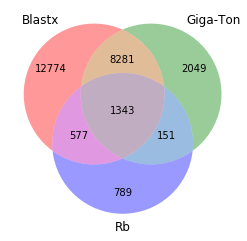

In [15]:
venn3_unweighted([lineaC, lineaG, lineaR], ('Blastx', 'Giga-Ton', 'Rb'))
plt.show()

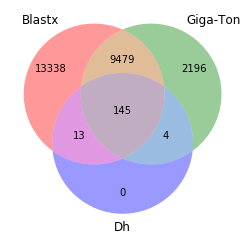

In [16]:
venn3_unweighted([lineaC, lineaG, lineaD], ('Blastx', 'Giga-Ton', 'Dh'))
plt.show()

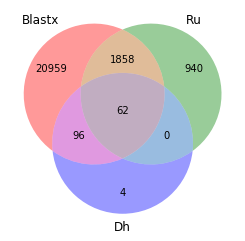

In [17]:
venn3_unweighted([lineaC, lineaR, lineaD], ('Blastx', 'Ru', 'Dh'))
plt.show()

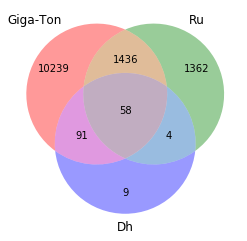

In [18]:
venn3_unweighted([lineaG, lineaR, lineaD], ('Giga-Ton', 'Ru', "Dh"))
plt.show()

## Other diagrams

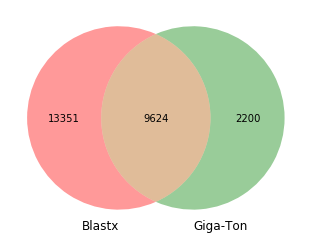

In [19]:
venn2_unweighted([lineaC, lineaG], ('Blastx', 'Giga-Ton'))
plt.show()

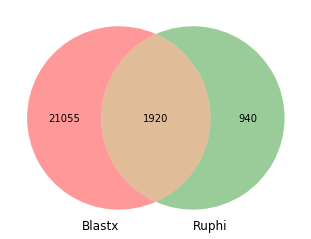

In [20]:
venn2_unweighted([lineaC, lineaR], ('Blastx', 'Ruphi'))
plt.show()

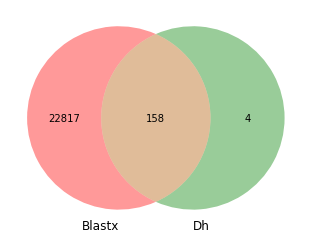

In [21]:
venn2_unweighted([lineaC, lineaD], ('Blastx', 'Dh'))
plt.show()